# SALES PREDICTION

### Importing the Necessary Header Files

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
sales=pd.read_csv("Advertising.csv")
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Checking For Null Values and Duplicates

In [7]:
print(sales.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [8]:
print(sales.duplicated().sum())

0


In [9]:
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
zero=(sales==0).sum()
zero

Unnamed: 0    0
TV            0
Radio         1
Newspaper     0
Sales         0
dtype: int64

In [12]:
sales[sales['Radio']==0]

,Unnamed: 0,TV,Radio,Newspaper,Sales
127,128,80.2,0.0,9.2,8.8


In [13]:
sales.drop(columns=['Unnamed: 0'],inplace = True,axis=1)
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [14]:
sales.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


### Data Visualization

<Axes: xlabel='TV', ylabel='Radio'>

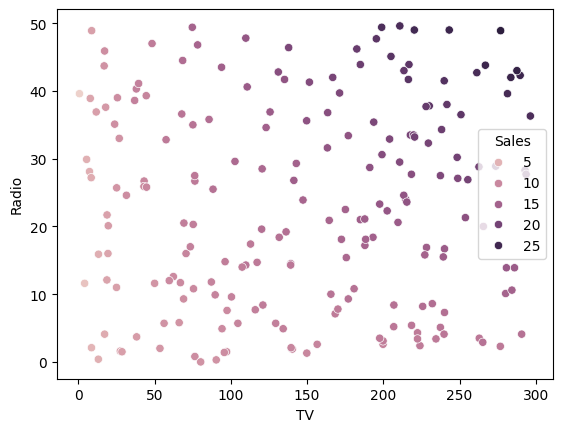

In [15]:
sns.scatterplot(data=sales,x='TV',y='Radio',hue='Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

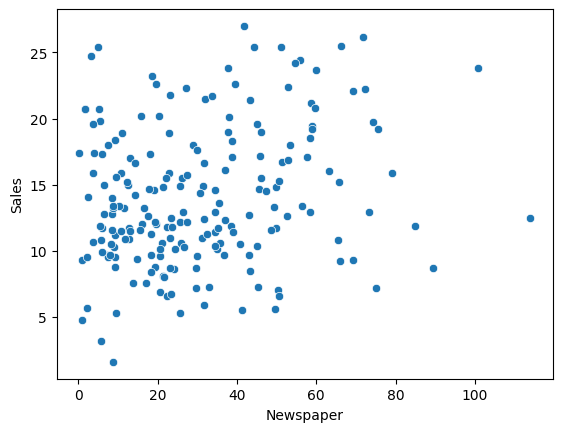

In [16]:
sns.scatterplot(data=sales,x='Newspaper',y='Sales',)

In [17]:
sales_correlation=sales.corr()
sales_correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

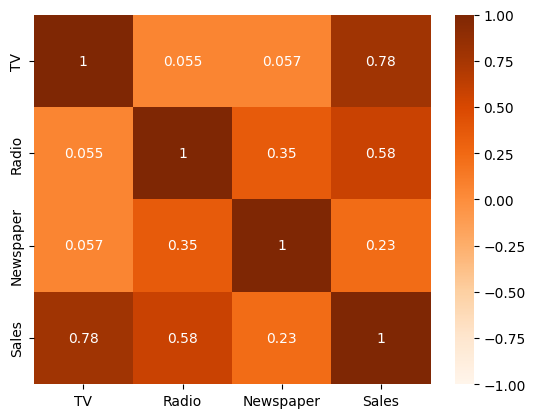

In [18]:
sns.heatmap(data=sales_correlation, vmin=-1,vmax=1,annot=True,cmap='Oranges')

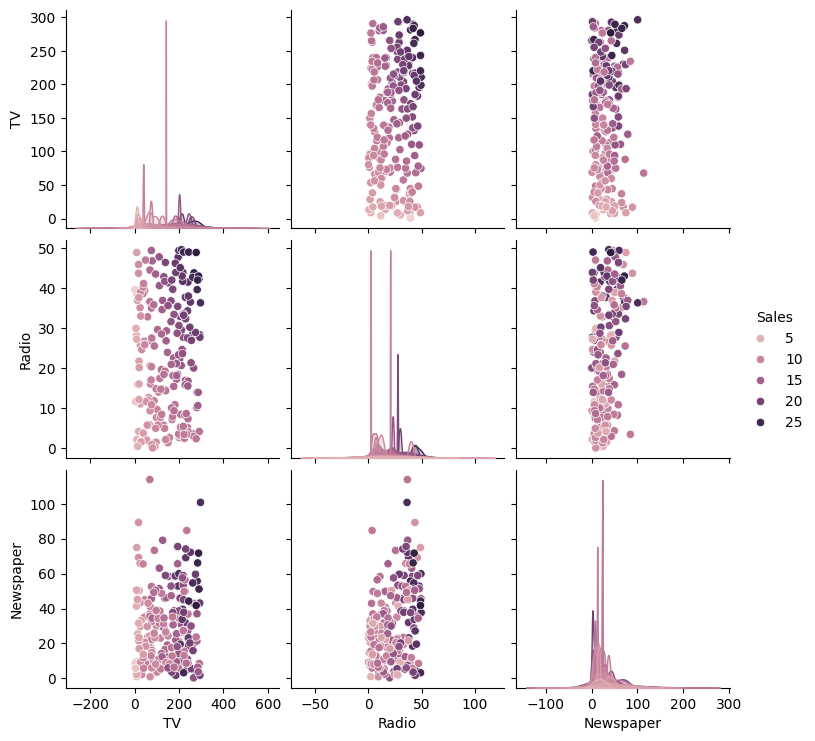

In [19]:
sns.pairplot(data=sales,hue='Sales')

### Model Training

In [24]:
X=sales.drop(columns=['Sales'])
Y=sales['Sales']
from sklearn.model_selection import train_test_split
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [25]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
linear_regression_pred = linear_regression_model.predict(X_test)
mae = mean_absolute_error(y_test, linear_regression_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.4937750024728964


In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, linear_regression_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.7279283306815096


In [29]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
mae = mean_absolute_error(y_test, random_forest_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.5464393939393934


In [30]:
mse = mean_squared_error(y_test, random_forest_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.42978092424242426
